In [1]:
import pandas as pd
import numpy as np
import os
import argparse

from sklearn.model_selection import StratifiedKFold
from sklearn.random_projection import GaussianRandomProjection

from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
# from keras.layers.noise import AlphaDropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import SGD

Using TensorFlow backend.


In [36]:
def get_network(input_shape,units1=128,units2=64,units3=8,
                       dropout_rate1=0.2,dropout_rate2=0.1,dropout_rate3=0.1, lr=0.00004):
    model = Sequential()
    model.add(Dense(units1, activation='relu', input_shape=(input_shape,)))
    # Add one hidden layer
    model.add(Dropout(dropout_rate1))
    model.add(Dense(units2, activation='relu'))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(units3, activation='relu'))
    model.add(Dropout(dropout_rate3))
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=lr, epsilon=.001)  # lr=0.00004
#     opt = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model


def get_network_2_bn(input_shape, units, dropout, epsilon, lr=0.00004):
    units1, units2 = units
    dropout_rate1, dropout_rate2 = dropout 
    
    model = Sequential()
    
    model.add(Dense(units1, input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate1))
    
    model.add(Dense(units2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate2))
    
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=lr, epsilon=epsilon)  # lr=0.00004
#     opt = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy', auroc])
    return model


def get_network_3_bn(input_shape, units, dropout, epsilon, lr=0.00004):
    units1, units2, units3 = units
    dropout_rate1, dropout_rate2, dropout_rate3 = dropout 
    
    model = Sequential()

    model.add(Dense(units1, input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate1))
    
    model.add(Dense(units2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate2))
    
    model.add(Dense(units3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate3))
    
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=lr, epsilon=epsilon)  # lr=0.00004
#     opt = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

def get_network_4_bn(input_shape, units, dropout, epsilon, lr=0.00004):
    model = Sequential()
    
    units1, units2, units3, units4 = units
    dropout_rate1, dropout_rate2, dropout_rate3, dropout_rate4 = dropout
    
    model.add(Dense(units1, input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate1))
    
    model.add(Dense(units2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate2))
    
    model.add(Dense(units3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate3))
    
    model.add(Dense(units4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate4))
    
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=lr, epsilon=epsilon)  # lr=0.00004
#     opt = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [3]:
data_path = '/legodata/zhaoj/cvd_risk_time2/genetic_data'
results_path = '/legodata/zhaoj/cvd_risk_time2/src/dnn/'
df_genetic = pd.read_csv(os.path.join(data_path, 'snps_5e6_with_demo.csv'))

# cmd_arg = get_args()

suffix = ''

print('# of SNPs:\t{}'.format(len(df_genetic.columns)))

if True:
    snps_col_lst = list(df_genetic.drop(['GENDER', 'AGE', 'RACE_A', 'RACE_B', 'RACE_W', 'RACE_U', 'GRID', 'CLASS'], axis=1).columns)
    df_genetic = pd.get_dummies(df_genetic.astype('str'), columns=snps_col_lst)
    df_genetic['CLASS'] = df_genetic['CLASS'].astype('int64')

if True:
    df_genetic = df_genetic.drop(['AGE', 'GENDER', 'RACE_A', 'RACE_U', 'RACE_W', 'RACE_B'], axis=1)
    suffix += '_drop_demo'

    
# if cmd_arg.csv_name:
# suffix += '_{}'.format('5e6')

# df_cv, df_cv_train_history = run_network(df_cohort=df_genetic,
#                                          results_path=results_path,
#                                          csv_name=cmd_arg.csv_name,
#                                          n_folds=10)

# df_cv.to_csv(os.path.join(results_path, 'df_cv{}.csv'.format(suffix)), index=False)
# df_cv_train_history.to_csv(os.path.join(results_path, 'df_cv_train_history{}.csv'.format(suffix)), index=False)

# of SNPs:	4119


In [4]:
df_cohort = pd.read_csv(os.path.join(data_path, 'for_framingham/processed', 'merged_fr_results.csv'))
print(len(df_genetic))
df_genetic_merged = df_genetic.merge(df_cohort[['GRID', 'predict']], how='inner', on='GRID')
print(len(df_genetic_merged))
df_genetic_merged.head()

37573
37421


,GRID,CLASS,rs2843152_0,rs2843152_1,rs2843152_2,rs35465346_0,rs35465346_1,rs35465346_2,rs28470722_0,rs28470722_1,...,rs8136727_0,rs8136727_1,rs8136727_2,rs9608859_0,rs9608859_1,rs9608859_2,rs6006426_0,rs6006426_1,rs6006426_2,predict
0,R248687632,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,1.0
1,R264130541,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0.0
2,R240479697,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,1.0
3,R204312273,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1.0
4,R294868998,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0.0


In [5]:
len(df_genetic.columns)

12333

In [6]:
len(df_genetic.loc[df_genetic['CLASS'] == 1])

13900

In [7]:
df_fram_genetic = df_genetic_merged.loc[((df_genetic_merged['predict']==0) & (df_genetic_merged['CLASS']==1)) | (df_genetic_merged['CLASS']==0)]
print(len(df_fram_genetic))

30248


In [8]:
print(len(df_fram_genetic.loc[df_fram_genetic['CLASS']==1]))
print(len(df_fram_genetic.loc[(df_fram_genetic['CLASS']==1) & (df_fram_genetic['predict']==0)]))

6653
6653


In [9]:
from keras.layers import Input
from keras.models import Model

def encode(X_train, X_test, n_comp): 
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(n_comp, activation='relu')(input_layer)
    decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded) 
    autoencoder = Model(input_layer, decoded) 
    
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    autoencoder.fit(X_train.values, X_train.values, 
                       epochs=20, 
                       batch_size=128, 
                       shuffle=False, validation_data=(X_train.values, X_train.values))
    
    encoder = Model(input_layer, encoded)
    
    X_train_encoded = encoder.predict(X_train.values) 
    X_test_encoded = encoder.predict(X_test.values) 
    
    return X_train_encoded, X_test_encoded

In [10]:
import keras

class EarlyStopAUROC(keras.callbacks.Callback):
    def __init__(self, file_path, tolerance=0.001, patience=8, verbose=1):
        super(keras.callbacks.Callback, self).__init__()
        self.tolerance=tolerance 
        self.patience=patience
        self.verbose=verbose
        self.count=0 
        self.max=0 
        self.file_path = file_path 


    def on_epoch_end(self, epoch, logs={}):
        predict = np.asarray(self.model.predict(self.validation_data[0]))
        target = self.validation_data[1]
        score = roc_auc_score(target, predict)
                   
        if score > self.max: 
            self.max = score
            print('\nSaving weight:\t{}'.format(self.max))
            self.model.save_weights(self.file_path)
            self.count = 0 
        else: 
            self.count += 1
            
        if self.count >= 8: 
            self.model.stop_trianing = True

In [26]:
import keras.backend as K
import tensorflow as tf 

def auroc(y_true, y_pred):
    auroc = roc_auc_score(y_true, y_pred)
    print(auroc)
    return auroc 

# define roc_callback, inspired by https://github.com/keras-team/keras/issues/6050#issuecomment-329996505
def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

def auc_2(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [37]:
from sklearn.utils.class_weight import compute_class_weight 


def run_genetic(df_train, df_test): 
    X_train, y_train = df_train.drop(['CLASS', 'GRID', 'predict'], axis=1), df_train['CLASS']
    X_test, y_test = df_test.drop(['CLASS', 'GRID', 'predict'], axis=1), df_test['CLASS']

#     rand_proj = GaussianRandomProjection(n_components=200)
#     rand_proj.fit(X_train)
#     X_train = rand_proj.transform(X_train)

    if False: 
        X_train, X_test = encode(X_train, X_test, n_comp=2000)

    print(X_train.shape) 
    
    model = get_network_2_bn(input_shape=X_train.shape[1], units=(512,8), dropout=(.2,.1), epsilon=.01)
#     model = get_network_3_bn(input_shape=X_train.shape[1], units=(1024,256,8), dropout=(.2,.2,.1), epsilon=.1)
    
    print('# of subjects in cohort:\t{}'.format(len(df_fram_genetic)))
#     print('# of features in cohort:\t{}'.format(len(df_fram_genetic.columns)))
    
    hdf5_file_path = os.path.join(results_path, 'test_genetic.hdf5')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=30, min_lr=0.000001, verbose=1)
    checkpointer = ModelCheckpoint(filepath=hdf5_file_path, monitor='val_auroc', verbose=1, mode='max', 
                                   save_best_only=True)
    
    early_stop = EarlyStopping(monitor='val_auc_2',
                               min_delta=.001,
                               patience=8,
                               verbose=1,
                               mode='max')

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    num_epochs = 100

    class_weight_vec = compute_class_weight(class_weight='balanced',
                                            classes=[0,1],
                                            y=y_train)
    
    history_model = model.fit(X_train,
                              y_train,
                              batch_size=256,
                              class_weight={0: class_weight_vec[0], 1: class_weight_vec[1]},
                              epochs=num_epochs,
                              verbose=1,
                              validation_split=0.11, callbacks=[reduce_lr, checkpointer])

    model.load_weights(hdf5_file_path)

#     X_test = rand_proj.transform(X_test)
    y_score = model.predict(X_test)

    auc = roc_auc_score(y_test, y_score)  # main_input
    # cvs_aucs.append(auc)
    ap = average_precision_score(y_test, y_score)


    dict_train_history = {'epoch': list(range(len(history_model.history['val_loss']))),
                          'val_loss': history_model.history['val_loss'],
                          'loss': history_model.history['loss'],
                          'val_acc': history_model.history['val_acc'],
                          'acc': history_model.history['acc'],
                          'fold': [fold] * len(history_model.history['val_loss'])}
    
    return {'CLASS': list(y_test), 'SCORE': list(y_score)}, dict_train_history

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X=df_fram_genetic,
                 y=df_fram_genetic['CLASS'])
#
# feat_lst = list(df_fram_genetic.columns)
# feat_lst.remove('CLASS')
# feat_lst.remove('GRID')
#
# df_pred_cv = pd.DataFrame()
# df_feat_cv = pd.DataFrame({'FEATURE': feat_lst})

df_pred_cv = pd.DataFrame()
df_train_cv = pd.DataFrame()

fold = 0


for train_index, test_index in skf.split(X=df_fram_genetic,
                                         y=df_fram_genetic['CLASS']):
    
    print('FOLD: {}'.format(fold))

    df_train, df_test = df_fram_genetic.iloc[train_index], df_fram_genetic.iloc[test_index]

    dict_fold_pred, dict_fold_train = run_genetic(df_train, df_test) 
        
    df_pred_cv = pd.concat([df_pred_cv, pd.DataFrame(dict_fold_pred)]) 
#     df_cv = pd.concat([df_cv, pd.DataFrame({'FOLD': [fold], 'AUC': [auc], 'AP': [ap]})])
    df_train_cv = pd.concat([df_train_cv, pd.DataFrame(dict_fold_train)])

    fold += 1

    break

# return df_cv, df_cv_train_history
# fold = 0
# for train_index, test_index in skf.split(X=df_fram_genetic,
#                                          y=df_fram_genetic['CLASS']):

FOLD: 0
(27222, 12331)


ValueError: Expected array-like (array or non-string sequence), got <tf.Tensor 'dense_33_target:0' shape=(?, ?) dtype=float32>

In [29]:
df_pred_cv.head()

,CLASS,SCORE
0,0,[0.255625]
1,0,[0.314649]
2,0,[0.592135]
3,1,[0.52449]
4,0,[0.115576]


0.547425179417


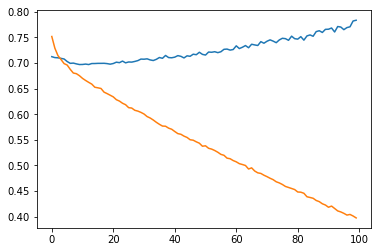

In [30]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score

y_score = list(df_pred_cv['SCORE']) 
y_test = list(df_pred_cv['CLASS'])
y_pred = [0 if score < .5 else 1 for score in y_score]

print(roc_auc_score(y_test, y_score))

plt.plot(df_train_cv['epoch'], df_train_cv['val_loss'])
plt.plot(df_train_cv['epoch'], df_train_cv['loss'])
plt.show()

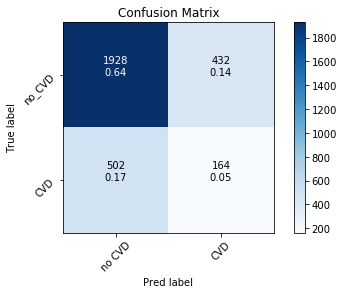

In [101]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_norm = c_matrix.astype('float') / c_matrix.sum()
c_matrix_norm

plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix') 
plt.colorbar()
tick_marks = np.arange(len(['no CVD', 'CVD']))
plt.xticks(tick_marks, ['no CVD', 'CVD'], rotation=45)
plt.yticks(tick_marks, ['no_CVD', 'CVD'], rotation=45)
                        
fmt = 'd'
thresh = c_matrix.max() / 4.
for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
#     plt.text(j, i, format(c_matrix[i, j], fmt),
    plt.text(j, i, '{}\n{}'.format(c_matrix[i,j], format(c_matrix_norm[i,j], '.2f')),
             horizontalalignment="center",
             color="white" if c_matrix[i, j] == c_matrix.max() else "black")
    
plt.tight_layout() 
plt.ylabel('True label') 
plt.xlabel('Pred label')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc

model = 'rf' 
name = '_no_pm_bin_reg_no_std'

# df_pred_1 = pd.read_csv(os.path.join(csv_path, folder, '{}_pred_{}{}.csv'.format(model, 'fram', name)))
# df_pred_2 = pd.read_csv(os.path.join(csv_path, folder, '{}_pred_{}{}.csv'.format(model, 'full', name)))


n_classes = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(df_pred['PRED'].ravel(), df_pred['SCORE'].ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
lw = 2
plt.plot(fpr[1], tpr[1], color='orange',  
         lw=lw, label='Fram ROC curve (area = {})'.format(round(roc_auc[1], 3)))


# n_classes = 2
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(df_pred_2['CLASS'], df_pred_2['SCORE'])
#     roc_auc[i] = auc(fpr[i], tpr[i])
    
# plt.plot(fpr[1], tpr[1], color='green', linestyle='--', 
#          lw=lw, label='Full ROC curve (area = {})'.format(round(roc_auc[1], 3)))
    
plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()